In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
import analyze # takes some time since inits hax
from channel_dict import channel_dict
from tqdm import tqdm
import datetime
import pickle
from scipy.stats import norm
import shutil

%matplotlib inline

In [2]:
import hax
#hax already initiated when analyze is imported

from spe_acceptance import data_dir_base, rawdata_dir


def data_exists(run_number):
    data_path=os.path.join(data_dir_base, 'run_%05d.h5' %int(run_number))
    return os.path.exists(data_path)

def all_data_exists(runlist):
    return all([data_exists(run) for run in runlist])

def file_to_list(runlist_file):
    return [int(run) for run in runlist_file.split('.')[0].split('_')[1:4]]

def get_run_time(run):
    return hax.runs.datasets[hax.runs.datasets.number == run].start.values[0]
    
def find_file(run):
    return [f for f in os.listdir('runlists') if any(int(run)==elem for elem in file_to_list(f))]

### Contour Plot

In [3]:
test_runlists=['runlist_18286_18287_18288.txt', 'runlist_17939_17940_17942.txt', 'runlist_18846_18847_18848.txt']
test_ch=[245, 126, 0]
runlists = [f for f in os.listdir('./runlists')]
qval=-25
ampval=6

q_acc_dict={}
amp_acc_dict={}

q_occ_dict={}
amp_occ_dict={}

#error dicts

q_acc_lerrs={}
q_acc_uerrs={}

amp_acc_lerrs={}
amp_acc_uerrs={}

q_occ_errs={}

amp_occ_errs={}

q_on_ch={}
amp_on_ch={}

bottom_runs=[]

with open('/project/lgrandi/xenon1t/spe_acceptance/ch_data/ch_data.pkl', 'rb') as cd:
    if os.stat('/project/lgrandi/xenon1t/spe_acceptance/ch_data/ch_data.pkl').st_size==0:
        print('No data in pickle file')
        data=[]
    else:
        data=pickle.load(cd)
saved_runlists=[]


for cd in data:
    if len(data)==0:
        continue
        
    runlist = file_to_list(cd.runlist)
    if not all_data_exists(runlist):
        resubmit_files.append(cd.runlist)
        for r in runs:
            if not data_exists(r):
                missing_runs.append(r)
        continue    
          
    saved_runlists.append(cd.runlist)
    
    
    amp_acc=cd.acc
    amp_acc_errs_l=cd.acc_errs_l
    amp_acc_errs_u=cd.acc_errs_u
    amp_acc_sys=cd.acc_sys
    amp_acc_stat=cd.acc_stat
    amp_occ=cd.occ
    amp_occ_sys=cd.occ_sys
    amp_occ_stat=cd.occ_stat
    amp_on_channels = cd.on_channels
    
    amp_on_ch[cd.runlist]=amp_on_channels
      
    
    bottom_run = runlist[0]
    topbulk_run = runlist[1]
    topring_run = runlist[2]
    
    bottom_runs.append(bottom_run)
    
    amp_acc_dict[cd.runlist]=amp_acc
    amp_occ_dict[cd.runlist]=amp_occ

    on_acc=amp_acc[amp_on_channels]

    #make error dicts
    amp_acc_lerrs[cd.runlist]=amp_acc_errs_l
    amp_acc_uerrs[cd.runlist]=amp_acc_errs_u
    
    amp_occ_errs[cd.runlist]=np.sqrt(amp_occ_stat**2+amp_occ_sys**2)
    
print("Amp data already exists for: ", saved_runlists)

Amp data already exists for:  ['runlist_9549_9550_9551.txt', 'runlist_12587_12588_12589.txt', 'runlist_7350_7351_7352.txt', 'runlist_6909_6910_6911.txt', 'runlist_6550_6551_6552.txt', 'runlist_7067_7068_7069.txt', 'runlist_12768_12769_12770.txt', 'runlist_11429_11430_11431.txt', 'runlist_7447_7448_7449.txt', 'runlist_16984_16985_16986.txt', 'runlist_10696_10697_10698.txt', 'runlist_6957_6958_6959.txt', 'runlist_12046_12047_12048.txt', 'runlist_17454_17455_17456.txt', 'runlist_7968_7969_7970.txt', 'runlist_7646_7647_7648.txt', 'runlist_18562_18563_18564.txt', 'runlist_11625_11626_11627.txt', 'runlist_17998_17999_18000.txt', 'runlist_18383_18384_18385.txt', 'runlist_10133_10134_10135.txt', 'runlist_8448_8449_8450.txt', 'runlist_7758_7759_7760.txt', 'runlist_6938_6939_6940.txt', 'runlist_16343_16344_16345.txt', 'runlist_9604_9605_9606.txt', 'runlist_9033_9034_9036.txt', 'runlist_7485_7486_7487.txt', 'runlist_11069_11070_11071.txt', 'runlist_7569_7570_7571.txt', 'runlist_16701_16702_16703.

In [4]:
with open('/project/lgrandi/xenon1t/spe_acceptance/ch_data/q_ch_data.pkl', 'rb') as qcd:
    if os.stat('/project/lgrandi/xenon1t/spe_acceptance/ch_data/q_ch_data.pkl').st_size==0:
        print('No data in pickle file')
        q_data=[]
    else:
        q_data=pickle.load(qcd)
        
q_saved_runlists=[]

for cd in q_data:
    if len(q_data)==0:
        continue
        
    runlist = file_to_list(cd.runlist)
    if not all_data_exists(runlist):
        resubmit_files.append(cd.runlist)
        for r in runs:
            if not data_exists(r):
                missing_runs.append(r)
        continue    
          
    q_saved_runlists.append(cd.runlist)
    
    
    q_acc=cd.acc
    q_acc_errs_l=cd.acc_errs_l
    q_acc_errs_u=cd.acc_errs_u
    q_acc_sys=cd.acc_sys
    q_acc_stat=cd.acc_stat
    q_occ=cd.occ
    q_occ_sys=cd.occ_sys
    q_occ_stat=cd.occ_stat
    q_on_channels = cd.on_channels

    q_on_ch[cd.runlist]=q_on_channels
      
    bottom_run = runlist[0]
    topbulk_run = runlist[1]
    topring_run = runlist[2]
    
    bottom_runs.append(bottom_run)
    
    q_acc_dict[cd.runlist]=q_acc
    q_occ_dict[cd.runlist]=q_occ

    #on_acc=q_acc[q_on_channels]

    #make error dicts
    q_acc_lerrs[cd.runlist]=q_acc_errs_l
    q_acc_uerrs[cd.runlist]=q_acc_errs_u
    
    print('stat: ', q_occ_stat)
    print('sys: ', q_occ_sys)
    
    q_occ_errs[cd.runlist]=np.sqrt(q_occ_stat**2+q_occ_sys**2)
    
print("Q data already exists for: ", q_saved_runlists)

No data in pickle file
Q data already exists for:  []


In [5]:
for runlist in tqdm(test_runlists):
    runs=file_to_list(runlist)
    if not all_data_exists(runs):
        print('Not all data for %s' %runlist)
        continue
    bot_run=runs[0]
    topb_run=runs[1]
    topr_run=runs[2]
    
    bottom_runs.append(bot_run)
    
    #find all the acc data, then put it in dictionaries
    thresholds = analyze.get_thresholds(analyze.find_regular_run(bot_run))
    
    q_acc, q_acc_stat, q_acc_sys=analyze.acceptance_3runs(bot_run, topb_run, topr_run, thresholds, val2corr2=qval, space='charge')
    
    q_acc_dict[runlist]=q_acc
    
    acc_lerrs=np.sqrt(q_acc_stat[0]**2+q_acc_sys**2)
    acc_uerrs=np.sqrt(q_acc_stat[1]**2+q_acc_sys**2)
    
    q_acc_lerrs[runlist]=acc_lerrs
    q_acc_uerrs[runlist]=acc_uerrs
    
    #find all the occ data, then put it in dictionaries
    q_occ, q_occ_sys, q_occ_stat=analyze.occupancy_3runs(bot_run, topb_run, topr_run, val2corr2=qval, space='charge')
    
    
    q_occ_dict[runlist]=q_occ

    q_occ_errs[runlist]=np.sqrt(q_occ_stat**2+q_occ_sys**2)
    
    #on channel dicts
    
    q_on_channels=np.where(q_occ>0.05)[0]
    
    q_on_ch[runlist]=q_on_channels
    
    cd=analyze.ch_data(runlist, get_run_time(bottom_run), q_acc, acc_lerrs, acc_uerrs, q_acc_sys, q_acc_stat, q_occ, q_occ_sys, q_occ_stat, q_on_channels)
    data.append(cd)
    
from spe_acceptance import change_permissions

os.remove('/project/lgrandi/xenon1t/spe_acceptance/ch_data/q_ch_data.pkl')
with open('/project/lgrandi/xenon1t/spe_acceptance/ch_data/q_ch_data.pkl', 'wb') as cd:
    pickle.dump(data, cd)
change_permissions('/project/lgrandi/xenon1t/spe_acceptance/ch_data/q_ch_data.pkl')    

  0%|          | 0/3 [00:00<?, ?it/s]/home/awalsh272/SPE/SPE/analyze.py:85: RuntimeWarning: invalid value encountered in true_divide
  sigma_corr_noise=corr_noise*np.sqrt( (sigma_corr/corrections)**2 + (sigma_noise/noise)**2)
100%|██████████| 3/3 [04:55<00:00, 98.96s/it] 


In [6]:
#Turn all the dictionaries into dataframes

q_acc_df=pd.DataFrame(q_acc_dict)
amp_acc_df=pd.DataFrame(amp_acc_dict)

q_occ_df=pd.DataFrame(q_occ_dict)
amp_occ_df=pd.DataFrame(amp_occ_dict)

q_acc_lerr_df=pd.DataFrame(q_acc_lerrs)
q_acc_uerr_df=pd.DataFrame(q_acc_uerrs)

amp_acc_lerr_df=pd.DataFrame(amp_acc_lerrs)
amp_acc_uerr_df=pd.DataFrame(amp_acc_uerrs)

q_occ_err_df=pd.DataFrame(q_occ_errs)

amp_occ_err_df=pd.DataFrame(amp_occ_errs)

q_occ_df
#print(q_occ_df.loc[3,'runlist_18286_18287_18288.txt' ])
#print(amp_occ_df.loc[126,'runlist_18286_18287_18288.txt'])

,runlist_17939_17940_17942.txt,runlist_18286_18287_18288.txt,runlist_18846_18847_18848.txt
0,0.226158,0.222427,0.228849
1,0.023287,-0.030914,-0.070200
2,0.026556,-0.067260,-0.053636
3,0.239696,0.118777,0.090047
4,0.250315,0.299968,0.245338
5,0.210066,0.122008,0.094019
6,0.193051,0.295800,0.222579
7,0.161527,0.147032,0.182666
8,0.197224,0.212501,0.190832
9,0.185971,0.173372,0.179872


In [7]:
amp_occ_df.loc[:, test_runlists]

,runlist_18286_18287_18288.txt,runlist_17939_17940_17942.txt,runlist_18846_18847_18848.txt
0,0.211569,0.228220,0.225921
1,-0.001490,0.001070,0.008975
2,-0.009522,0.006518,0.004943
3,0.193406,0.206467,0.202672
4,0.241787,0.240131,0.254275
5,0.199678,0.204122,0.218764
6,0.201034,0.180730,0.265479
7,0.168992,0.173088,0.179728
8,0.172518,0.174920,0.174197
9,0.177115,0.182909,0.179984


In [8]:
q_occ_err_df

,runlist_17939_17940_17942.txt,runlist_18286_18287_18288.txt,runlist_18846_18847_18848.txt
0,5.012665,5.021485,5.015852
1,4.911863,4.894373,4.901034
2,4.911762,4.791830,4.807025
3,5.121132,4.976639,4.980712
4,5.108030,5.201786,5.132446
5,5.071871,5.022192,5.053921
6,5.002286,5.161841,5.085404
7,4.784022,4.766522,4.828012
8,4.817883,4.852829,4.813047
9,4.813631,4.810521,4.825284


In [11]:
amp_vals=[i for i in range(3,20)]   
q_vals=[i for i in range(-60,10)]

def make_occ_ratio(run, ch, amp_vals, q_vals):
    
    s=analyze.SPE(os.path.join(data_dir_base, 'run_%d.h5' %run))
    amp_occ_dict={}
    q_occ_dict={}

    amp_occ_array=np.ones((len(amp_vals)))
    q_occ_array=np.ones((len(q_vals)))

    ratio_df=pd.DataFrame(0, index=q_vals, columns=amp_vals)

    for a,a_val in enumerate(amp_vals):        
        amp_corrs, amp_corr_errs=s.make_correction(a_val, 'amplitude')
        amp_corr=amp_corrs[ch]
        amp_occ_array[a]=-1*np.log(amp_corr)
        
        for q, q_val in enumerate(q_vals):
            q_corrs, q_corr_errs=s.make_correction(q_val, 'charge')
            q_corr=q_corrs[ch]
            q_occ_array[q]=-1*np.log(q_corr)        
            ratio_df.loc[q_val,a_val]=q_occ_array[q]/amp_occ_array[a]

    return ratio_df

  0%|          | 0/3 [00:00<?, ?it/s]
0it [00:00, ?it/s]/home/awalsh272/SPE/SPE/analyze.py:85: RuntimeWarning: invalid value encountered in true_divide
  sigma_corr_noise=corr_noise*np.sqrt( (sigma_corr/corrections)**2 + (sigma_noise/noise)**2)
/home/awalsh272/SPE/SPE/analyze.py:62: RuntimeWarning: divide by zero encountered in true_divide
  corr=led_firstN / noise_firstN
/home/awalsh272/SPE/SPE/analyze.py:63: RuntimeWarning: invalid value encountered in true_divide
  sigma_corr=corr*np.sqrt((sigma_led_firstN/led_firstN)**2 + (sigma_noise_firstN/noise_firstN)**2)


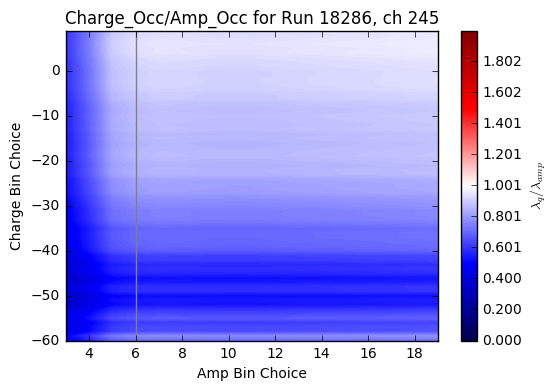


1it [00:12, 12.92s/it]

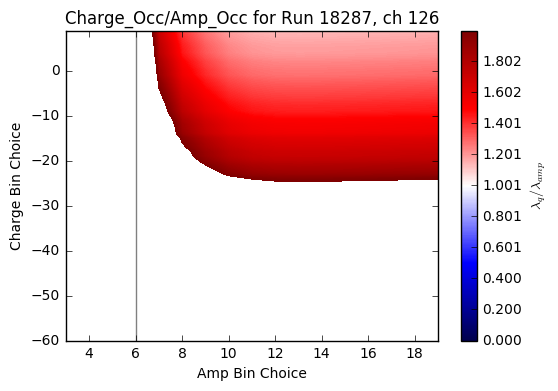


2it [00:25, 12.94s/it]/home/awalsh272/SPE/SPE/analyze.py:62: RuntimeWarning: invalid value encountered in true_divide
  corr=led_firstN / noise_firstN


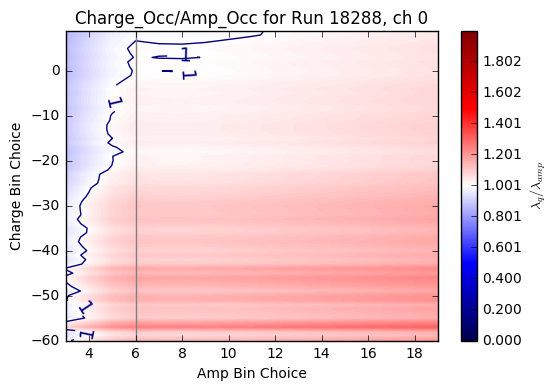


3it [00:38, 12.98s/it]
 33%|███▎      | 1/3 [00:38<01:17, 38.97s/it]
0it [00:00, ?it/s]

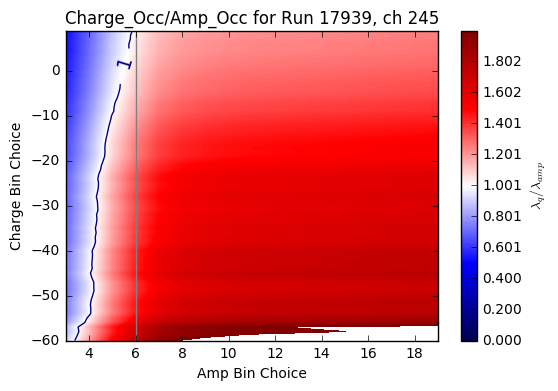


1it [00:14, 14.16s/it]

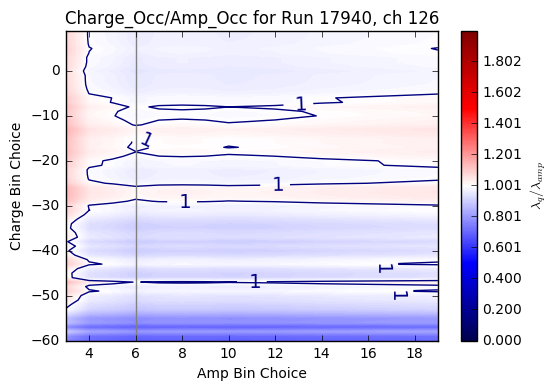


2it [00:28, 14.12s/it]

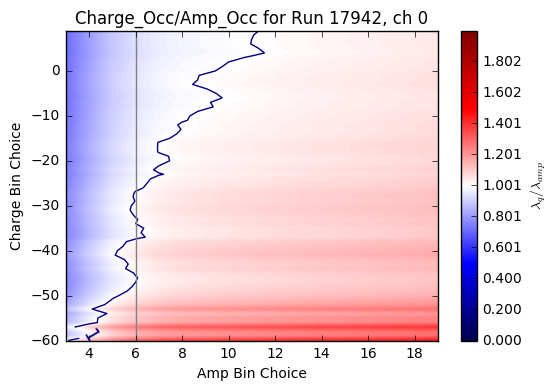


3it [00:42, 14.10s/it]
 67%|██████▋   | 2/3 [01:21<00:39, 39.95s/it]
0it [00:00, ?it/s]

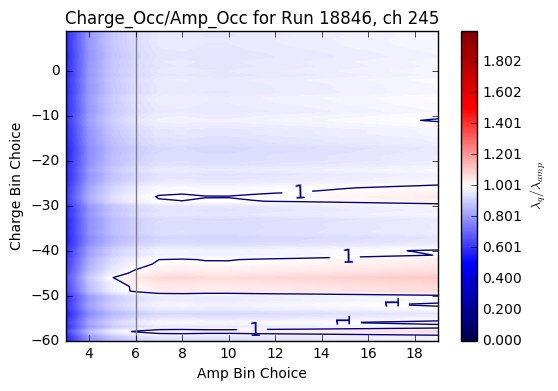


1it [00:13, 13.53s/it]

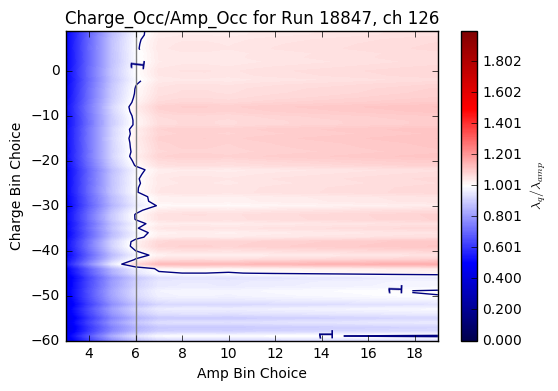


2it [00:26, 13.50s/it]

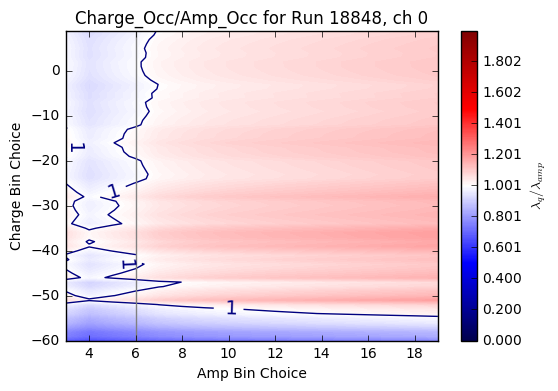


3it [00:40, 13.51s/it]
100%|██████████| 3/3 [02:01<00:00, 40.12s/it]


In [12]:
for runlist in tqdm(test_runlists):
    runs=file_to_list(runlist)
    for run, ch in tqdm(zip(runs, test_ch)):
        ratio_df=make_occ_ratio(run, ch, amp_vals, q_vals)
        pd.set_option('display.max_rows', 500)
    
        #print(ratio_df)
        X, Y=np.meshgrid(amp_vals, q_vals)

        cl=plt.contour(X,Y, ratio_df.values, levels=[1])#, norm=MidpointNormalize(midpoint=1))
        plt.clabel(cl, fmt = '%2.1d', fontsize=14)
        cp=plt.contourf(X,Y,ratio_df.values, levels=np.linspace(0,2,1000), cmap='seismic', vmin=0, vmax=2)
        plt.colorbar(cp,label='$\lambda_q/\lambda_{amp}$')
        plt.axvline(x=6, color='gray')
        plt.xlabel("Amp Bin Choice")
        plt.ylabel("Charge Bin Choice")
        plt.title('Charge_Occ/Amp_Occ for Run %d, ch %d' %(run, ch))
        plt.show()

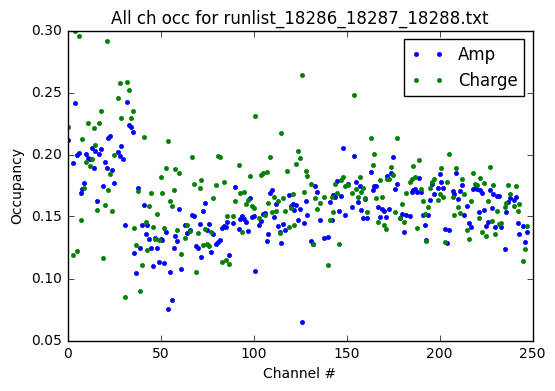

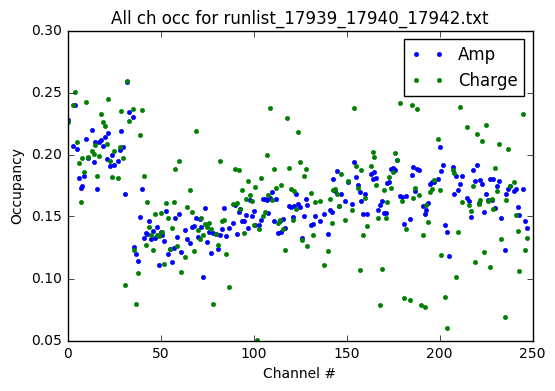

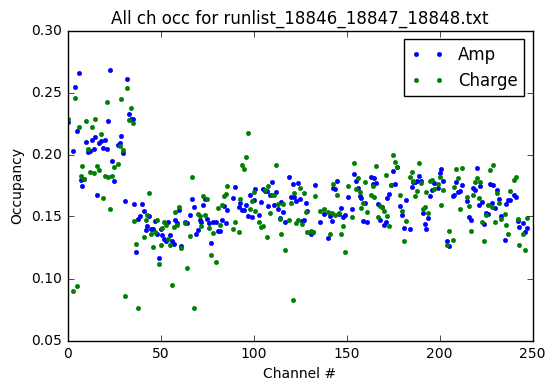

In [9]:
def plot_occ_rl(runlist):
    aoc=amp_on_ch[runlist]
    qoc=q_on_ch[runlist]
    
    plt.figure()
    plt.plot(aoc, amp_occ_df.loc[aoc,runlist], linestyle='None', marker='.', label="Amp")
    plt.plot(qoc, q_occ_df.loc[qoc, runlist], linestyle='None', marker='.', label="Charge")
    #plt.errorbar(aoc, amp_occ_df.loc[aoc,runlist], yerr=amp_occ_err_df.loc[aoc, runlist]], linestyle='None', marker='.', label="Amp")
    #plt.errorbar(qoc, q_occ_df.loc[qoc, runlist], yerr=q_occ_err_df.loc[qoc, runlist], linestyle='None', marker='.', label="Charge")
    plt.xlabel('Channel #')
    plt.ylabel("Occupancy")
    plt.title("All ch occ for %s" %runlist)
    plt.legend()
    plt.show()
    
for runlist in test_runlists:
    plot_occ_rl(runlist)

runlist_18286_18287_18288.txt    0.142056
runlist_17939_17940_17942.txt    0.172074
runlist_18846_18847_18848.txt    0.144633
Name: 245, dtype: float64
runlist_18286_18287_18288.txt    0.114507
runlist_17939_17940_17942.txt    0.232796
runlist_18846_18847_18848.txt    0.135787
Name: 245, dtype: float64


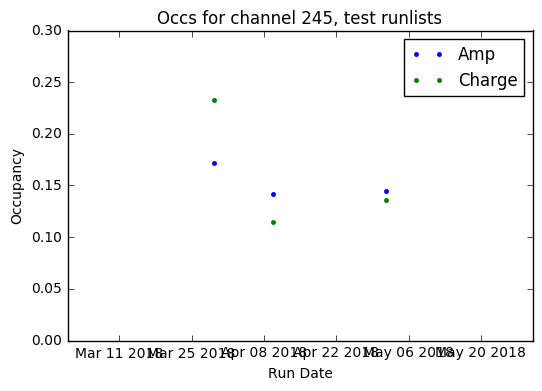

runlist_18286_18287_18288.txt    0.065228
runlist_17939_17940_17942.txt    0.132511
runlist_18846_18847_18848.txt    0.146515
Name: 126, dtype: float64
runlist_18286_18287_18288.txt    0.264101
runlist_17939_17940_17942.txt    0.130694
runlist_18846_18847_18848.txt    0.144302
Name: 126, dtype: float64


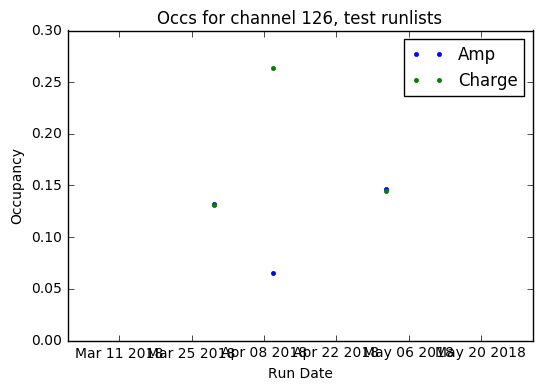

runlist_18286_18287_18288.txt    0.211569
runlist_17939_17940_17942.txt    0.228220
runlist_18846_18847_18848.txt    0.225921
Name: 0, dtype: float64
runlist_18286_18287_18288.txt    0.222427
runlist_17939_17940_17942.txt    0.226158
runlist_18846_18847_18848.txt    0.228849
Name: 0, dtype: float64


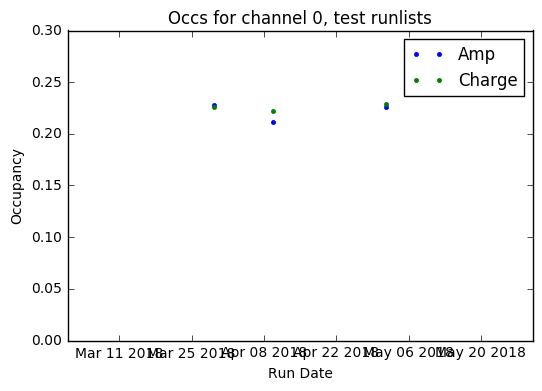

In [10]:
test_bot=[]
for rl in test_runlists:
    runs=file_to_list(rl)
    test_bot.append(runs[0])
dates = [get_run_time(run) for run in test_bot]

def plot_occ_ch(ch):
    print(amp_occ_df.loc[ch,test_runlists])
    print(q_occ_df.loc[ch,test_runlists])
    plt.figure()
    plt.plot(dates, amp_occ_df.loc[ch,test_runlists], linestyle='None', marker='.', label='Amp')
    plt.plot(dates, q_occ_df.loc[ch,test_runlists], linestyle='None', marker='.', label="Charge")
    #plt.errorbar(dates, amp_occ_df.loc[ch,test_runlists], yerr=amp_occ_err_df.loc[ch,test_runlists],linestyle='None', marker='.', label='Amp')
    #plt.errorbar(dates, q_occ_df.loc[ch,test_runlists], yerr=q_occ_err_df.loc[ch,test_runlists], linestyle='None', marker='.', label="Charge")
    plt.title("Occs for channel %d, test runlists" %ch)
    plt.xlabel("Run Date")
    plt.ylabel("Occupancy")
    plt.xlim([datetime.date(2018, 3,1), datetime.date(2018,5, 30)])
    plt.ylim(0,0.3)
    plt.legend()
    plt.show()
    
for ch in test_ch:
    plot_occ_ch(ch)

### Histograms

In [ ]:
#plot the acceptance of one runlist
for runlist in test_runlists:
    qoc=q_on_ch[runlist]
    aoc=amp_on_ch[runlist]
    plt.hist(amp_acc_df.loc[aoc, runlist], bins=50, range=(0,1.1))
    plt.title("Amp Acceptance for %s " %runlist)
    plt.xlabel("SPE Acceptance")
    plt.ylabel("Counts")
    plt.xlim(0, 1.1)
    plt.show()
    
    plt.hist(q_acc_df.loc[qoc,runlist], bins=50, range=(0,1.1))
    plt.title("Charge Acceptance for %s " %runlist)
    plt.xlabel("SPE Acceptance")
    plt.ylabel("Counts")
    plt.xlim(0, 1.1)
    plt.show()

In [ ]:
#plot the occupancy of one runlist
for runlist in test_runlists:
    qoc=q_on_ch[runlist]
    aoc=amp_on_ch[runlist]
    plt.hist(amp_occ_df.loc[aoc,runlist], bins=50, range=(0,1.1))
    plt.title("Amp Occupancy for %s " %runlist)
    plt.xlabel("Occupancy")
    plt.ylabel("Counts")
    plt.xlim(0,0.25)
    plt.show()
    
    plt.hist(q_occ_df.loc[qoc,runlist], bins=50, range=(0,1.1))
    plt.title("Charge Occupancy for %s " %runlist)
    plt.xlabel("Occupancy")
    plt.ylabel("Counts")
    plt.xlim(0,0.25)
    plt.show()

### Time Evo for single channels

In [ ]:
import matplotlib.dates as mdates
from dateutil.relativedelta import relativedelta
import datetime

months = mdates.MonthLocator()
years = mdates.YearLocator()
datetimefmt = mdates.DateFormatter("%d-%m")


#dates = [get_run_time(run) for run in bottom_runs]
today = datetime.date.today()


def plot_channel(ch):
    f, ax = plt.subplots(figsize=(8,5))
    ax.fmt_xdata = mdates.DateFormatter('%d-%m')
    ax.errorbar(dates, q_acc_df.loc[ch,test_runlists], yerr=[q_acc_lerr_df.loc[ch, test_runlists], q_acc_uerr_df.loc[ch,test_runlists]], linestyle='None', 
                color='navy', marker='.', label='Charge')
    ax.errorbar(dates, amp_acc_df.loc[ch,test_runlists], yerr=[amp_acc_lerr_df.loc[ch, test_runlists], amp_acc_uerr_df.loc[ch,test_runlists]], linestyle='None', 
                color='r', marker='.', label="Amplitude")
    ax.xaxis.set_major_formatter(datetimefmt)
    ax.xaxis.set_major_locator(months)
    plt.xlabel('Date')
    plt.ylabel('SPE Acceptance')
    plt.title('Channel %d' %ch)
    plt.legend(loc='best')
    f.autofmt_xdate()
    plt.grid()
    plt.ylim(-0.1, 1.75)
    plt.xlim(datetime.date(year=2018, month=1, day=1), datetime.date(year=2018, month=5, day=30) )
    #plt.savefig('plots/ch%d.png' % ch)
    plt.show()

In [ ]:
#Just a few channels

for ch in test_ch:
    plot_channel(ch)

In [ ]:
#Every Channel

for ch in np.arange(248):
    plot_channel(ch)

In [ ]:
def plot_ch_diff(ch, runlists):
    diffs=[]
    for runlist in runlists:
        diffs.append(q_acc_df.loc[ch, runlist]-amp_acc_df.loc[ch, runlist])
    print('%d diffs: ' %ch, diffs)
    
    
    plt.figure()
    plt.plot(dates, diffs, linestyle='None', marker='.', label='Q-Amp')
    plt.xlabel("Date")
    plt.ylabel("SPE Acceptance")
    plt.title("Q Acc-Amp Acc, ch %d" %ch)
    plt.xlim(datetime.date(year=2018, month=1, day=1), datetime.date(year=2018, month=5, day=30) )
    plt.legend(loc='best')
    plt.show()

In [ ]:
for ch in np.arange(248):
    plot_ch_diff(ch, test_runlists)

In [ ]:
acc_diffs=[]
runlist=test_runlists[0]
for ch in np.arange(248):
    diff=q_acc_df.loc[ch, runlist]-amp_acc_df.loc[ch, runlist]
    print("ch: ", ch)
    print("diff: ",diff)
    print(q_acc_df.loc[ch, runlist])
    print(amp_acc_df.loc[ch, runlist])
    acc_diffs.append(q_acc_df.loc[ch, runlist]-amp_acc_df.loc[ch, runlist])
print("max: ", max(acc_diffs))   
plt.hist(acc_diffs, bins=20)
plt.xlabel("Acceptance")
plt.ylabel("Counts")
plt.xlim(-2,2)
plt.title("Difference Between Acc Methods, %s" %runlist)
plt.show()

In [ ]:
occ_diffs=[]
for ch in np.arange(248):
    diff=q_occ_df.loc[ch, runlist]-amp_occ_df.loc[ch, runlist]
    print(runlist, ch, diff)
    print(q_occ_df.loc[ch, runlist])
    print(amp_occ_df.loc[ch, runlist])
    occ_diffs.append(diff)
    
plt.hist(occ_diffs, bins=50)
plt.xlabel("Occupancy")
plt.ylabel("Counts")
plt.title("Occ difference between two methods, %s" %runlist)
plt.show()

In [ ]:
check_runlist='runlist_18846_18847_18848.txt'
check_topb_runs=[18287, 18847, 17940]
check_topb_ch=[126, 125, 62]
check_runs=file_to_list(check_runlist)
new_check_runs=file_to_list('runlist_18286_18287_18288.txt')
check_ch=[245, 62, 3]
for run, ch in zip(new_check_runs, check_ch):
    s=analyze.SPE(os.path.join(data_dir_base, 'run_%d.h5' %run))
    amp_res, amp_sigma_res, amp_led, amp_noise, amp_corr_noise=s.residual(val2corr2=ampval, space='amplitude')
    q_res, q_sigma_res, q_led, q_noise, q_corr_noise=s.residual(val2corr2=qval, space='charge')
    amp_LED, bins = np.histogram(amp_led, bins=1099, range=(-100.5, 999.5))
    
    #test_corr_noise=amp_corr*q_noise
    #test_res1=q_led.T[ch]-test_corr_noise.T[ch]
    
    q_acc=analyze.A_func(q_res)
    amp_acc=analyze.A_func(amp_res)
    
    #print(np.shape(q_acc), np.shape(amp_acc))
    
    #changes bins from edges to centers
    bins = 0.5 * (bins[1:] + bins[:-1])
    
    plt.figure()
    plt.plot(bins, q_acc[ch], label="Charge Acc")
    plt.plot(bins, amp_acc[ch], label='Amp Acc')
    plt.legend()
    plt.xlabel("Amplitude [ADC Counts]")
    plt.ylabel("Acc Frac")
    plt.title("Charge/Amp Acc Curve, ch %d, run %d" %(ch, run))
    plt.xlim(-50,250)
    plt.show()
    
    #plt.figure()
    #plt.plot(bins, test_res1, linestyle='None', marker='.')
    #plt.title('Amp corr on q led residual, ch %d' %ch)
    #plt.xlabel("Amplitude [ADC Counts]")
    #plt.ylabel('Counts/Bin')
    #plt.yscale('log')
    #plt.xlim(-100,250)
    #plt.show()
    
    #amp residual
    plt.figure()
    plt.errorbar(bins, amp_res[ch], yerr=amp_sigma_res[ch], linestyle='None', marker='.', label='Amp Res')
    plt.legend()
    plt.yscale('log')
    plt.xlim(-100, 250)
    plt.title("Amp Res, run %d, ch %d" %(run,ch))
    plt.xlabel('Amplitude [ADC Counts]')
    plt.ylabel("Counts/Bin")
    plt.show()
    
    #charge residual
    plt.figure()
    plt.errorbar(bins, q_res[ch], yerr=q_sigma_res[ch], linestyle='None', marker='.', label='Q Res')
    plt.legend()
    plt.yscale('log')
    plt.xlim(-100, 250)
    plt.ylim(-1000, 1000)
    plt.title("Charge Res, run %d, ch %d" %(run,ch))
    plt.xlabel('Amplitude [ADC Counts]')
    plt.ylabel("Counts/Bin")
    plt.show()
    
    #charge led/noise spectra
    plt.figure()
    #plt.plot(bins, q_led.T[ch], linestyle='None', marker='.', label='Q LED', color='k')
    #plt.plot(bins, q_noise.T[ch], linestyle="None", marker='.', label='Q Noise', color='r')
    plt.plot(bins, q_corr_noise.T[ch], linestyle='None', marker='.', label='Q Corr Noise', color='y')
    plt.plot(bins, amp_led.T[ch], linestyle='None', marker='.', label='Amp LED', color='k')
    plt.plot(bins, amp_noise.T[ch], linestyle="None", marker='.', label='Amp Noise', color='r')
    plt.plot(bins, amp_corr_noise.T[ch], linestyle='None', marker='.', label='Amp Corr Noise', color='b')
    plt.xlim(-10, 50)
    plt.yscale('log')
    plt.xlabel('Amplitude [ADC Counts]')
    plt.ylabel("Counts/Bin")
    plt.title("Amp LED/Noise Spectra, ch %d, run" %ch)
    plt.legend()
    plt.show()
    